In [98]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score, accuracy_score, f1_score

In [99]:
extracted_pure_m2 = pd.read_csv("./data/extracted_pure_m2.csv")

In [100]:
extracted_pure_m2.columns

Index(['XOAVelocity', 'XPeakmg', 'XRMSmg', 'XKurtosis', 'XCrestFactor',
       'XSkewness', 'XDeviation', 'XPeaktoPeakDisplacement', 'YOAVelocity',
       'YPeakmg', 'YRMSmg', 'YKurtosis', 'YCrestFactor', 'YSkewness',
       'YDeviation', 'YPeaktoPeakDisplacement', 'ZOAVelocity', 'ZPeakmg',
       'ZRMSmg', 'ZKurtosis', 'ZCrestFactor', 'ZSkewness', 'ZDeviation',
       'ZPeaktoPeakDisplacement'],
      dtype='object')

In [101]:
extracted_pure_m2.describe()

XOAVelocity       XPeakmg        XRMSmg     XKurtosis  XCrestFactor  \
count  11537.000000  11537.000000  11537.000000  11537.000000  11537.000000   
mean       0.089090      0.139308      0.139051      0.024659      0.092597   
std        0.118836      0.179555      0.179399      0.036925      0.148246   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.043956      0.000000      0.000000      0.000000      0.000000   
50%        0.070190      0.082949      0.081433      0.027790      0.017635   
75%        0.070252      0.202765      0.201954      0.036171      0.132002   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          XSkewness    XDeviation  XPeaktoPeakDisplacement   YOAVelocity  \
count  11537.000000  11537.000000             11537.000000  11537.000000   
mean       0.159690      0.090503                 0.101812      0.128883   
std        0.134749      0.135188                 0.088772      0.086096   
min        0.000000      0.000000                 0.000000      0.000000   
25%        0.000000      0.000000                 0.019608      0.047619   
50%        0.256522      0.007222                 0.137255      0.168254   
75%        0.269565      0.143333                 0.150323      0.178999   
max        0.582609      0.841111                 0.784314      1.000000   

            YPeakmg  ...  YDeviation  YPeaktoPeakDisplacement   ZOAVelocity  \
count  11537.000000  ...     11537.0                  11537.0  11537.000000   
mean       0.247998  ...         0.0                      0.0      0.084952   
std        0.146944  ...         0.0                      0.0      0.099493   
min        0.000000  ...         0.0                      0.0      0.000000   
25%        0.080163  ...         0.0                      0.0      0.000000   
50%        0.349185  ...         0.0                      0.0      0.081579   
75%        0.350452  ...         0.0                      0.0      0.126316   
max        1.000000  ...         0.0                      0.0      0.857895   

            ZPeakmg        ZRMSmg  ZKurtosis  ZCrestFactor  ZSkewness  \
count  11537.000000  11537.000000    11537.0       11537.0    11537.0   
mean       0.068730      0.068770        0.0           0.0        0.0   
std        0.093100      0.093111        0.0           0.0        0.0   
min        0.000000      0.000000        0.0           0.0        0.0   
25%        0.000000      0.000000        0.0           0.0        0.0   
50%        0.049718      0.049672        0.0           0.0        0.0   
75%        0.108717      0.108716        0.0           0.0        0.0   
max        1.000000      1.000000        0.0           0.0        0.0   

         ZDeviation  ZPeaktoPeakDisplacement  
count  11537.000000             11537.000000  
mean       0.063502                 0.040334  
std        0.076018                 0.048284  
min        0.000000                 0.000000  
25%        0.000000                 0.000000  
50%        0.000000                 0.000000  
75%        0.154501                 0.098078  
max        0.154559                 0.098456  

[8 rows x 24 columns]

In [102]:
extracted_pure_m2 = extracted_pure_m2[[
    "XOAVelocity",
    "YOAVelocity",
    "ZOAVelocity",
]]

### kmeans

In [103]:
data = extracted_pure_m2.copy()

kmeans = KMeans(n_clusters=2)
data["cluster"] = kmeans.fit_predict(data)
data["cluster"] = data["cluster"].astype(str)

f1, f2, f3 = "XOAVelocity", "YOAVelocity", "ZOAVelocity"
fig = px.scatter_3d(data, x=f1, y=f2, z=f3, color="cluster", color_discrete_sequence=["#1616a7", "#6c4516"], size_max=10)
fig.update_traces(marker=dict(size=5), selector=dict(mode="markers+text"))
fig.update_layout(scene=dict(xaxis_title=f1, yaxis_title=f2, zaxis_title=f3))
fig.update_layout(width=970, height=800)

fig.show()

In [104]:
# f1, f2, f3 = "XPeaktoPeakDisplacement", "YPeaktoPeakDisplacement", "ZPeaktoPeakDisplacement"
# fig = px.scatter_3d(data, x=f1, y=f2, z=f3, color="cluster", color_discrete_sequence=["#1616a7", "#6c4516"], size_max=10)
# fig.update_traces(marker=dict(size=5), selector=dict(mode="markers+text"))
# fig.update_layout(scene=dict(xaxis_title=f1, yaxis_title=f2, zaxis_title=f3))
# fig.update_layout(width=970, height=800)

# fig.show()

In [105]:
data["cluster"] = data["cluster"].astype(int)

In [106]:
silhouette_score(data.drop(columns=["cluster"]), data["cluster"])

0.7309910258111019

### isolationforest

In [107]:
data = extracted_pure_m2.copy()

isolation_forest = IsolationForest(contamination=0.05, random_state=42)
data["is_anomaly"] = isolation_forest.fit_predict(data)
data["is_anomaly"] = data["is_anomaly"].replace({-1: 1, 1: 0}).astype(str)

f1, f2, f3 = "XOAVelocity", "YOAVelocity", "ZOAVelocity"
fig = px.scatter_3d(data, x=f1, y=f2, z=f3, color="is_anomaly", color_discrete_sequence=["#1616a7", "#6c4516"], size_max=10)
fig.update_traces(marker=dict(size=5), selector=dict(mode="markers+text"))
fig.update_layout(scene=dict(xaxis_title=f1, yaxis_title=f2, zaxis_title=f3))
fig.update_layout(width=970, height=800)

fig.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



In [108]:
# f1, f2, f3 = "XPeaktoPeakDisplacement", "YPeaktoPeakDisplacement", "ZPeaktoPeakDisplacement"
# fig = px.scatter_3d(data, x=f1, y=f2, z=f3, color="is_anomaly", color_discrete_sequence=["#1616a7", "#6c4516"], size_max=10)
# fig.update_traces(marker=dict(size=5), selector=dict(mode="markers+text"))
# fig.update_layout(scene=dict(xaxis_title=f1, yaxis_title=f2, zaxis_title=f3))
# fig.update_layout(width=970, height=800)

# fig.show()

In [109]:
data["is_anomaly"] = data["is_anomaly"].astype(int)

In [110]:
silhouette_score(data.drop(columns=["is_anomaly"]), data["is_anomaly"])

0.7267218889215753

In [111]:
clf = RandomForestClassifier()
clf.fit(data.drop(columns=["is_anomaly"]), data["is_anomaly"])

RandomForestClassifier()

In [112]:
explainer = shap.TreeExplainer(clf)
explanation = explainer(data.drop(columns=["is_anomaly"]))
explanation.values = explanation.values[:, :, 0]
explanation.base_values = explanation.base_values[0, 1]

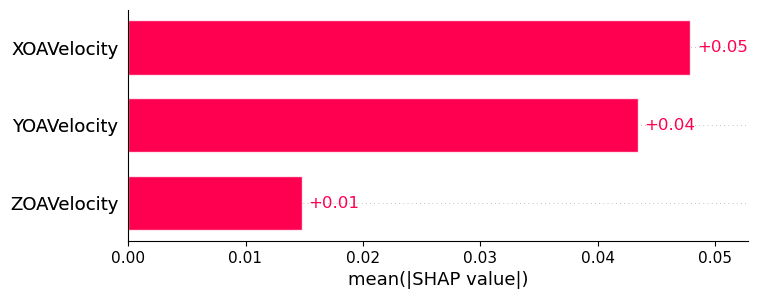

In [113]:
shap.plots.bar(explanation, max_display=24)

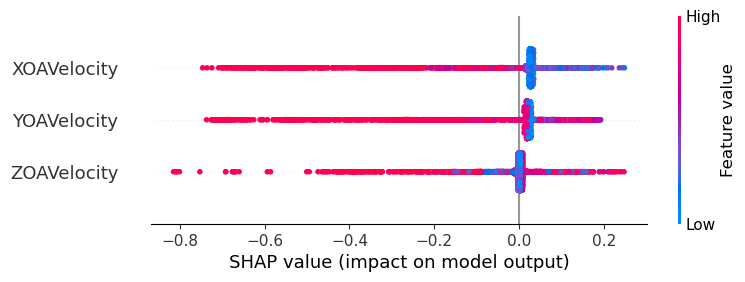

In [114]:
shap.plots.beeswarm(explanation, max_display=24)

In [115]:
# shap.plots.scatter(explanation[:, "XOAVelocity"])

In [116]:
# shap.plots.scatter(explanation[:, "YOAVelocity"])

In [117]:
# shap.plots.scatter(explanation[:, "ZOAVelocity"])

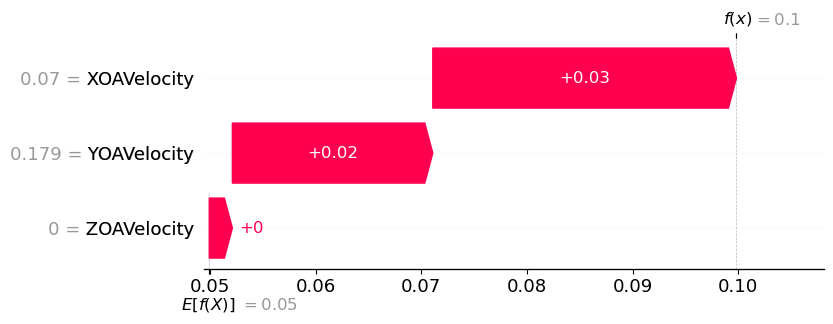

In [118]:
shap.plots.waterfall(explanation[32])

### oneclasssvm

In [119]:
data = extracted_pure_m2.copy()

one_class_svm = OneClassSVM(kernel="rbf", gamma="auto", nu=0.1)
data["is_anomaly"] = one_class_svm.fit_predict(data)
data["is_anomaly"] = data["is_anomaly"].replace({-1: 1, 1: 0}).astype(str)

f1, f2, f3 = "XOAVelocity", "YOAVelocity", "ZOAVelocity"
fig = px.scatter_3d(data, x=f1, y=f2, z=f3, color="is_anomaly", color_discrete_sequence=["#1616a7", "#6c4516"], size_max=10)
fig.update_traces(marker=dict(size=5), selector=dict(mode="markers+text"))
fig.update_layout(scene=dict(xaxis_title=f1, yaxis_title=f2, zaxis_title=f3))
fig.update_layout(width=970, height=800)

fig.show()

In [120]:
# f1, f2, f3 = "XPeaktoPeakDisplacement", "YPeaktoPeakDisplacement", "ZPeaktoPeakDisplacement"
# fig = px.scatter_3d(data, x=f1, y=f2, z=f3, color="is_anomaly", color_discrete_sequence=["#1616a7", "#6c4516"], size_max=10)
# fig.update_traces(marker=dict(size=5), selector=dict(mode="markers+text"))
# fig.update_layout(scene=dict(xaxis_title=f1, yaxis_title=f2, zaxis_title=f3))
# fig.update_layout(width=970, height=800)

# fig.show()

In [121]:
data["is_anomaly"] = data["is_anomaly"].astype(int)

In [122]:
silhouette_score(data.drop(columns=["is_anomaly"]), data["is_anomaly"])

0.5626876983345132